#### Aug. 9, 2018 1pm

In [1]:
import numpy   as np
import pandas  as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing   import scale, StandardScaler
from sklearn.decomposition   import PCA, TruncatedSVD

import pickle
from nltk.corpus import stopwords

import re

---

### Large Pickled Dataset



In [2]:
%%time
df = pd.read_pickle("newRev_VegCols_US.pkl")

CPU times: user 804 ms, sys: 532 ms, total: 1.34 s
Wall time: 1.34 s


In [3]:
df['vegFriendly'].value_counts()

0.0    733919
1.0    189083
Name: vegFriendly, dtype: int64

In [4]:
X_df = df.drop(['vegFriendly', 'Vegan', 'Vegetarian'], axis=1)
y_df = df['vegFriendly']

In [5]:
X_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923002 entries, 0 to 923001
Data columns (total 17 columns):
business_id    923002 non-null object
name           923002 non-null object
review_id      923002 non-null object
stars          923002 non-null int64
date           923002 non-null datetime64[ns]
text           923002 non-null object
useful         923002 non-null int64
funny          923002 non-null int64
cool           923002 non-null int64
city           923002 non-null object
state          923002 non-null object
Thai           923002 non-null float64
Italian        923002 non-null float64
Indian         923002 non-null float64
Chinese        923002 non-null float64
Mexican        923002 non-null float64
Text_length    923002 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(5), object(6)
memory usage: 119.7+ MB


In [6]:
%%time
X_df.iloc[:, 5] = X_df['text'].apply( lambda rev: re.sub(r'(\d+)', '', rev) )

CPU times: user 16.6 s, sys: 180 ms, total: 16.8 s
Wall time: 16.8 s


In [7]:
%%time
X_df.iloc[:, 5] = X_df['text'].apply( lambda rev: re.sub(r'^[a]*[a-zA-Z]*$', '', rev) )

CPU times: user 6.95 s, sys: 0 ns, total: 6.95 s
Wall time: 6.95 s


In [8]:
%%time
X_df.iloc[:, 5] = X_df['text'].apply( lambda rev: rev.replace('_', '') )

CPU times: user 684 ms, sys: 4 ms, total: 688 ms
Wall time: 687 ms


In [51]:
%%time
X_df.iloc[:, 5] = X_df['text'].apply( lambda rev: re.sub(r'[a][a][a]*', '', rev) )

CPU times: user 2.02 s, sys: 0 ns, total: 2.02 s
Wall time: 2.03 s


In [52]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.3)

In [53]:
print( X_train.shape, X_test.shape)

(646101, 17) (276901, 17)


---

### Manipulate data sets

In [54]:
stopWords = list(stopwords.words('english'))
stopWords.extend(['good', 'excellent', 'best', 'like', 'place', 'really', 'ordered', 'amazing', 'fantastic', 'am', 'pm'])

In [55]:
vectorizer = TfidfVectorizer(stop_words=stopWords)

#### Vectorize Review Text

In [56]:
%%time
X_train_term  = vectorizer.fit_transform(X_train['text'])

CPU times: user 45.3 s, sys: 1.9 s, total: 47.2 s
Wall time: 47.2 s


In [57]:
X_train_term.shape

(646101, 140511)

In [58]:
ftrs = vectorizer.get_feature_names()

In [59]:
ftrs

['aa',
 'aaa',
 'aaaa',
 'aaaaa',
 'aaaaaa',
 'aaaaaaaaaaaaaaaaaaaaaaaaaauuuuuuuuuuuuuuuuggggggggggggggggggg',
 'aaaaaaah',
 'aaaaaaamazing',
 'aaaaaaand',
 'aaaaaamazing',
 'aaaaahhhh',
 'aaaaahhhhhhmazing',
 'aaaaahhhhmaaazeballs',
 'aaaaamazing',
 'aaaaand',
 'aaaack',
 'aaaamazing',
 'aaaammmazziiigggg',
 'aaaand',
 'aaaarrgh',
 'aaah',
 'aaahh',
 'aaahhhh',
 'aaahhhhh',
 'aaahhhhmmmaaazzziiiinnnnggg',
 'aaammaziiiing',
 'aaand',
 'aab',
 'aaboud',
 'aac',
 'aachi',
 'aadd',
 'aaggh',
 'aagh',
 'aah',
 'aahan',
 'aahc',
 'aahhh',
 'aahhhh',
 'aahhhhhh',
 'aahhhhhhmazing',
 'aahhhhhmazing',
 'aahhhhmazing',
 'aahing',
 'aahran',
 'aajúa',
 'aakowa',
 'aaliyah',
 'aalll',
 'aallll',
 'aaloo',
 'aalyssa',
 'aam',
 'aamazing',
 'aamco',
 'aammmazing',
 'aammmazinggggg',
 'aammmazzzinnngg',
 'aand',
 'aandd',
 'aanddddd',
 'aanold',
 'aanyway',
 'aaovdvrdbvfzjbtweela',
 'aapam',
 'aardvark',
 'aare',
 'aargh',
 'aarghhh',
 'aarika',
 'aaron',
 'aarp',
 'aarrrggghh',
 'aarón',
 'aas',
 '

#### Reduce Dimensionality

In [89]:
svd = TruncatedSVD(n_components=80, n_iter=7)

In [90]:
%%time
X_train_term_svd = svd.fit_transform(X_train_term)  

CPU times: user 1min 31s, sys: 16.6 s, total: 1min 48s
Wall time: 1min 5s


In [91]:
svd.singular_values_

array([130.60072794,  58.83453226,  57.11193631,  54.38374513,
        50.82276521,  45.55518781,  45.18818365,  43.22887021,
        41.90091574,  39.94763999,  38.57396569,  38.53790321,
        37.69858395,  37.05075837,  36.8966179 ,  36.46194121,
        35.98057463,  35.49932485,  34.85479034,  34.81332635,
        34.57486825,  34.43420756,  33.90985757,  33.04214154,
        32.87573742,  32.70300947,  32.62635095,  32.37493284,
        32.15087684,  32.07910202,  31.79106397,  31.60765789,
        31.45788704,  31.30206897,  30.92822686,  30.83032843,
        30.70781248,  30.60666659,  30.35678897,  30.28638753,
        30.11206397,  29.96251395,  29.79480728,  29.62470153,
        29.27111767,  29.22051599,  29.0211425 ,  28.96415589,
        28.81321507,  28.80295909,  28.56245006,  28.47969525,
        28.46230461,  28.35106266,  28.22693011,  28.16038816,
        28.09517152,  27.99357755,  27.92725383,  27.87839868,
        27.8375207 ,  27.58141153,  27.47410282,  27.37

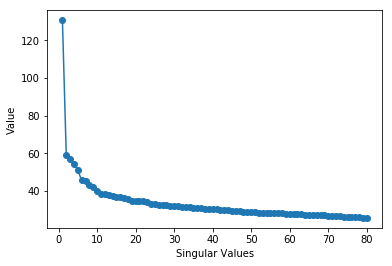

In [92]:
s = svd.singular_values_

x = [i+1 for i in range(len(s))]
plt.plot(x, s, marker='o')
plt.xlabel("Singular Values")
plt.ylabel("Value");

---

### Percentage of Variance Explained

In [93]:
print("Percentage of explained variance (dimRed)", svd.explained_variance_ratio_.sum()*100)

Percentage of explained variance (dimRed) 13.986214213587559


---

#### Random Forest - Train

In [94]:
from sklearn.ensemble import RandomForestClassifier

In [95]:
RF_model = RandomForestClassifier(n_jobs=-1)

In [96]:
%%time
RF_model.fit(X_train_term_svd, y_train)

CPU times: user 1min 51s, sys: 156 ms, total: 1min 51s
Wall time: 21.6 s


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

---

#### Random Forest - Test

In [97]:
%%time
X_test_term = vectorizer.transform(X_test['text'])

CPU times: user 19.9 s, sys: 152 ms, total: 20 s
Wall time: 20 s


In [98]:
X_test_term.shape

(276901, 140511)

In [99]:
%%time
X_test_term_svd = svd.transform(X_test_term)

CPU times: user 740 ms, sys: 48 ms, total: 788 ms
Wall time: 789 ms


In [100]:
X_test_term_svd.shape

(276901, 80)

In [101]:
%%time
pred = RF_model.predict(X_test_term_svd)

CPU times: user 1.36 s, sys: 16 ms, total: 1.38 s
Wall time: 357 ms


In [102]:
len(pred)

276901

In [103]:
pred[:30]

array([0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [104]:
np.unique(pred)

array([0., 1.])

In [105]:
import itertools 
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
        This function prints and plots the confusion matrix.
        Normalization can be applied by setting `normalize=True`.
    """
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

#     print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [106]:
y_test[:10]

339096    1.0
147873    0.0
54278     0.0
182325    0.0
560540    1.0
838324    0.0
377834    1.0
140260    0.0
276141    1.0
444189    0.0
Name: vegFriendly, dtype: float64

In [107]:
pred[:10]

array([0., 0., 0., 0., 1., 0., 1., 0., 0., 0.])

In [108]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [109]:
lbls = ['vegFriendly', 'Non-vegFriendly']

cm = confusion_matrix(y_test, pred)
cm

array([[216859,   3531],
       [ 28898,  27613]])

In [110]:
from sklearn.metrics import classification_report

In [111]:
print(classification_report(y_test, pred))

             precision    recall  f1-score   support

        0.0       0.88      0.98      0.93    220390
        1.0       0.89      0.49      0.63     56511

avg / total       0.88      0.88      0.87    276901



In [112]:
accuracy_score(y_test, pred)

0.8828859411847556

In [113]:
precision_score(y_test, pred)

0.8866234266632417

In [114]:
recall_score(y_test, pred)

0.488630532108793

In [115]:
f1_score(y_test, pred)

0.6300382180138041

Confusion matrix, without normalization


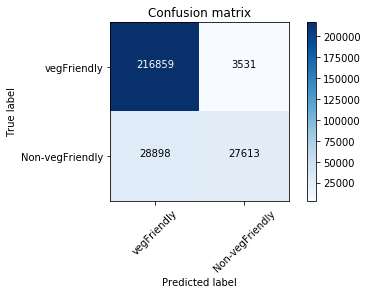

In [116]:
plot_confusion_matrix(cm,lbls)

In [119]:
importances = RF_model.feature_importances_

importances

array([0.01281726, 0.0191319 , 0.0108724 , 0.02055267, 0.01435753,
       0.01327582, 0.01309196, 0.02737856, 0.01755797, 0.01127195,
       0.01190934, 0.0159216 , 0.0183918 , 0.01533611, 0.01153841,
       0.01283773, 0.02643714, 0.01840192, 0.01408931, 0.01067423,
       0.01846671, 0.01528385, 0.02078428, 0.01080808, 0.01103691,
       0.03701255, 0.01307939, 0.01032017, 0.0102699 , 0.01002963,
       0.01036059, 0.01059388, 0.01185692, 0.01096004, 0.01098129,
       0.01092107, 0.01187615, 0.01095598, 0.01090185, 0.01080877,
       0.01034013, 0.01086791, 0.01174725, 0.00997809, 0.00993466,
       0.01018976, 0.01007048, 0.01079001, 0.00992854, 0.01093004,
       0.01071439, 0.00969585, 0.01030161, 0.01114102, 0.01069055,
       0.01076928, 0.00979317, 0.01019603, 0.01008758, 0.01024857,
       0.01017145, 0.01030081, 0.00972583, 0.00984229, 0.01033082,
       0.01067204, 0.01092625, 0.01087778, 0.01058105, 0.00998816,
       0.01067232, 0.01043425, 0.01043236, 0.01021133, 0.01021

In [121]:
indices = np.argsort(importances)[::-1]
indices

array([25,  7, 16, 22,  3,  1, 20, 17, 12,  8, 11, 13, 21,  4, 18,  5,  6,
       26, 15,  0, 10, 36, 32, 42, 14,  9, 53, 24, 34, 33, 37, 49, 66, 35,
       38, 67,  2, 41, 77, 39, 23, 47, 76, 55, 50, 54, 19, 78, 70, 65, 31,
       68, 75, 71, 72, 30, 40, 64, 27, 52, 61, 79, 28, 59, 74, 73, 57, 45,
       60, 58, 46, 29, 69, 43, 44, 48, 63, 56, 62, 51])

In [126]:
indices = indices.reshape(1,80)

In [129]:
important_words = svd.inverse_transform(np.array(indices))

In [130]:
important_words.shape

(1, 140511)

In [133]:
iw_ind = np.argsort(important_words)[::-1]
iw_ind

array([[ 21466,  47255,  10596, ..., 113851,  70183, 104499]])

In [140]:
stop = 100
cnt = 0
for ind in iw_ind[0]:
    print(ftrs[ind])
    if cnt == stop:
         break
    cnt += 1

cheese
fresh
beef
got
much
try
buffet
pretty
always
times
people
price
mexican
delicious
back
also
one
going
wait
sushi
went
family
fries
better
coming
burger
years
two
say
meat
would
sauce
customer
friendly
made
staff
eat
happy
enchiladas
tried
nachos
know
many
since
right
portions
mongolian
sure
must
mac
cream
hour
table
sandwich
think
area
even
couple
several
ingredients
crust
different
authentic
taste
guacamole
take
ago
flavor
keep
things
big
margaritas
quality
love
large
burgers
crab
three
restaurants
tasted
shredded
decided
orange
enough
though
eaten
kids
line
tortillas
fajitas
owned
home
thought
quesadilla
soon
reviews
still
enchilada
ice
lot
toppings


TypeError: only integer scalar arrays can be converted to a scalar index

In [ ]:
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)

indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()